# -------------------------------------------  Week 6 Assignment--------------------------------


This assignment aims to utilize given datasets for both classification and regression tasks. The students will start by cleaning and analyzing the data using Numpy and Pandas, followed by visualizing the data using Matplotlib. They will then apply 2 to 3 different machine learning models for classification datasets only and evaluate the models' performance.
Datasets:
1. Classification Dataset: `weather_classification_data.csv`
Note: You need to apply Preprocessing steps on both dataset but just has to write code for classification models only.

    
    --------------Task Details------------------
    
### 1. Data Cleaning and Preparation
1. Loading Data:
   - Load the datasets.
   - Display the first few rows of each dataset to understand its structure.

2. Handling Missing Values:
   - Identify and handle missing values in both datasets. Provide a justification for the methods used to handle missing data.

3. Data Transformation:
   - Convert categorical variables to numerical variables using appropriate encoding techniques (e.g., one-hot encoding, label encoding).
   - Normalize/standardize the numerical features.

4. Data Splitting:
   - Split the data into training and testing sets using an 80-20 split

##### 2. Data Analysis and Visualization
1. Exploratory Data Analysis (EDA):
   - Perform EDA on both datasets to identify key patterns, correlations, and insights.
   - Generate summary statistics (mean, median, standard deviation, etc.) for the datasets.
   - Identify any patterns, correlations, or anomalies in the data.

2. Visualization:
  - Create various plots to visualize data:
Histograms: To show the distribution of individual features.
Scatter Plots: To show relationships between pairs of features.
Box Plots: To identify outliers and understand the spread of data.
Correlation Heatmaps: To visualize correlations between features.
   - Use Matplotlib to create these visualizations and ensure all plots are well-labeled and easy to interpret.
##### 3. Machine Learning Models
Classification Task:
   - Apply at least three different classification algorithms (e.g., Logistic Regression, Decision Trees, Random Forest) to the `weather_classification_data.csv` dataset with the reason why you choose those models.
   - Train the models on the training set and evaluate their performance on the test set using appropriate evaluation metrics.
4. Model Evaluation and Comparison
1. Model Performance Comparison:
   - Compare the performance of different models for classification tasks.
   - Create tables or visualizations to summarize the performance metrics of each model.
   - Discuss which model performed the best for each task and provide possible reasons for its superior performance.
   
   
#### Submission Requirements
Directory Structure:
Create a directory named week_6.
Inside this directory, create two subdirectories named classification and regression.
Perform all tasks related to the classification dataset in the classification directory and all tasks related to the regression dataset in the regression directory.
GitHub Repository:
Upload your entire project directory (week_6) to your GitHub repository.
Code Documentation:
Ensure that your code is well-documented with comments in the notebook markdown explaining each step.

### Report:
Include a report in both the classification and regression directories summarizing your findings, visualizations, and model performance. Use Jupyter Notebooks for this purpose.
The report should include:
Introduction: Brief description of the datasets and objectives.
Data Cleaning and Preparation: Steps taken to clean and prepare the data.
Data Analysis and Visualization: Key insights from EDA and visualizations.
Model Building: Details of the models used and their training process.
Model Evaluation: Comparison of model performance and interpretation of results.
Conclusion: Summary of findings and possible future work.


# Dataset Descriptions

### Classification Dataset (`weather_classification_data.csv`):
This dataset is synthetically generated to mimic weather data for classification tasks. It includes various weather-related features and categorizes the weather into four types: Rainy, Sunny, Cloudy, and Snowy. This dataset is designed for practicing classification algorithms, data preprocessing, and outlier detection methods.
Variables
Temperature (numeric): The temperature in degrees Celsius, ranging from extreme cold to extreme heat.
Humidity (numeric): The humidity percentage, including values above 100% to introduce outliers.
Wind Speed (numeric): The wind speed in kilometers per hour, with a range including unrealistically high values.
Precipitation (%) (numeric): The precipitation percentage, including outlier values.
Cloud Cover (categorical): The cloud cover description.
Atmospheric Pressure (numeric): The atmospheric pressure in hPa, covering a wide range.
UV Index (numeric): The UV index, indicates the strength of ultraviolet radiation.
Season (categorical): The season during which the data was recorded.
Visibility (km) (numeric): The visibility in kilometers, including very low or very high values.
Location (categorical): The type of location where the data was recorded.
Weather Type (categorical): The target variable for classification, indicating the weather type.

### Regression Dataset (`pakwheels_used_cars.csv`):
This data has been scraped from PakWheels, the most renowned second-hand car-selling company's website.
The data contains approximately more than 78,000 cars with 13 different features and prices as targets. The feature names are:
ad_ref: a unique ad reference
city: advertisement city (the location where the vehicle is sold)
assembly: imported or not (local)
body: body type of vehicle
make: manufacturer of vehicle
model: model variant of vehicle
year: year of production
engine_cc: engine volume of vehicle
transmission: Auto/Manual
fuel_type: petrol, diesel or hybrid
color: color of vehicle
registered: registration number city/province of vehicle
mileage: mileage in km
price: price of the vehicle in PKR

In [1]:
#importing pandas library
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [2]:
# Loading the dataset
weather = pd.read_csv("weather_classification_data.csv")

In [3]:
#Displaying first 5 rows 
weather.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [12]:
#checkig missing values
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Temperature                13200 non-null  float64
 1   Humidity                   13200 non-null  float64
 2   Wind Speed                 13200 non-null  float64
 3   Precipitation (%)          13200 non-null  float64
 4   Atmospheric Pressure       13200 non-null  float64
 5   UV Index                   13200 non-null  float64
 6   Visibility (km)            13200 non-null  float64
 7   Weather Type               13200 non-null  int32  
 8   Cloud Cover_clear          13200 non-null  bool   
 9   Cloud Cover_cloudy         13200 non-null  bool   
 10  Cloud Cover_overcast       13200 non-null  bool   
 11  Cloud Cover_partly cloudy  13200 non-null  bool   
 12  Season_Autumn              13200 non-null  bool   
 13  Season_Spring              13200 non-null  boo

In [5]:
# Handling Missing Values
#
weather.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [7]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split



# Data transformation
# Convert categorical variables to numerical
categorical_cols = ['Cloud Cover', 'Season', 'Location']
for col in categorical_cols:
    if col in weather.columns:
        weather = pd.get_dummies(weather, columns=[col])

# Encode the target variable 'Weather Type'
label_encoder = LabelEncoder()
weather['Weather Type'] = label_encoder.fit_transform(weather['Weather Type'])

# Normalize/Standardize numerical features
numerical_features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
scaler = StandardScaler()
weather[numerical_features] = scaler.fit_transform(weather[numerical_features])

# Data splitting
X = weather.drop('Weather Type', axis=1)
y = weather['Weather Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the transformed data
print(X_train.head())
print(y_train.head())


      Temperature  Humidity  Wind Speed  Precipitation (%)  \
3958     0.740404 -0.134243   -0.554712           1.200664   
2239    -0.237413  1.351385    0.169040           0.105042   
3608     0.510330 -0.530410   -0.482337          -1.334918   
6848     1.603184  0.757134    5.018179           0.981540   
6119    -0.064857 -0.134243    0.603291          -1.366221   

      Atmospheric Pressure  UV Index  Visibility (km)  Cloud Cover_clear  \
3958              0.117804 -0.520104        -1.175461              False   
2239              0.299802 -1.038715        -0.433923              False   
3608              0.525351  1.554340         1.049153               True   
6848             -0.364746 -0.520104        -1.027154              False   
6119             -0.155596 -0.779410         0.752538              False   

      Cloud Cover_cloudy  Cloud Cover_overcast  Cloud Cover_partly cloudy  \
3958               False                 False                       True   
2239            

In [ ]:
# Ensure boolean columns are converted to integer type
weather = weather.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Exploratory Data Analysis (EDA)
# Summary statistics
print(weather.describe())

# Visualization
# Histograms for numerical features only
numerical_features = weather.select_dtypes(include=[np.number])
numerical_features.hist(bins=30, figsize=(15, 10))
plt.show()

# Scatter plots (excluding boolean columns)
sns.pairplot(numerical_features)
plt.show()

# Box plots (excluding boolean columns)
plt.figure(figsize=(15, 10))
sns.boxplot(data=numerical_features)
plt.xticks(rotation=90)
plt.show()

# Correlation heatmaps (excluding boolean columns)
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.show()

In [13]:
weather.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type
count,1.320000e+04,1.320000e+04,1.320000e+04,1.320000e+04,1.320000e+04,1.320000e+04,1.320000e+04,13200.000000
mean,-6.136505e-17,3.445056e-16,2.368476e-17,1.098112e-16,-5.307539e-16,4.844610e-18,3.768030e-18,1.500000
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.118076
min,-2.538158e+00,-2.412206e+00,-1.423215e+00,-1.679256e+00,-5.530053e+00,-1.038715e+00,-1.620384e+00,0.000000
25%,-8.701176e-01,-5.799313e-01,-6.994626e-01,-1.084490e+00,-2.964633e-01,-7.794096e-01,-7.305386e-01,0.750000
50%,1.076993e-01,6.384073e-02,-1.204609e-01,1.363456e-01,4.898368e-02,-2.607985e-01,-1.373081e-01,1.500000
75%,6.828857e-01,7.571337e-01,5.309161e-01,8.876291e-01,2.942242e-01,7.764237e-01,6.042299e-01,2.250000
max,5.169340e+00,1.995157e+00,5.597181e+00,1.732823e+00,5.198698e+00,2.591563e+00,4.311920e+00,3.000000


Model: Logistic Regression
Accuracy: 0.8708333333333333
Precision: 0.8717023141252689
Recall: 0.8708333333333333
F1 Score: 0.870718351921665
ROC AUC Score: 0.9584703713005341
[[549  57  20  25]
 [ 46 543  50   8]
 [ 21   8 658  14]
 [ 52  25  15 549]]


Model: Decision Tree
Accuracy: 0.9083333333333333
Precision: 0.9083325748326371
Recall: 0.9083333333333333
F1 Score: 0.9082833396245431
ROC AUC Score: 0.9389172723355675
[[581  39  15  16]
 [ 36 578  12  21]
 [ 15  13 661  12]
 [ 22  15  26 578]]


Model: Random Forest
Accuracy: 0.9136363636363637
Precision: 0.914086403091111
Recall: 0.9136363636363637
F1 Score: 0.9137660333352187
ROC AUC Score: 0.9928832700871046
[[583  34  18  16]
 [ 36 591   8  12]
 [ 17  15 657  12]
 [ 28  18  14 581]]


                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.870833   0.871702  0.870833  0.870718  0.958470
1        Decision Tree  0.908333   0.908333  0.908333  0.908283  0.938917
2        Random Forest  0.9

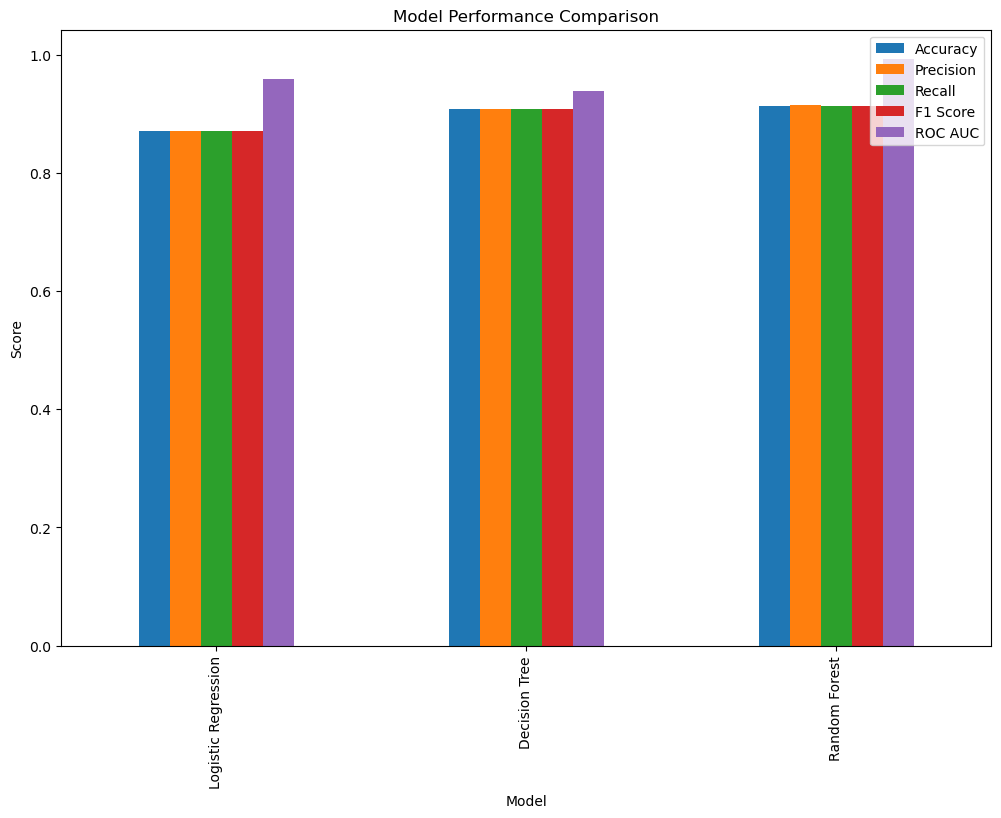

In [10]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Training and Evaluation
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)  # Get class probabilities
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average='weighted')}")
    print(f"Recall: {recall_score(y_test, y_pred, average='weighted')}")
    print(f"F1 Score: {f1_score(y_test, y_pred, average='weighted')}")
    
    # Calculate ROC AUC Score
    if len(set(y_test)) > 2:  # If there are more than 2 classes
        roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
    else:
        roc_auc = roc_auc_score(y_test, y_pred_proba[:, 1])
    
    print(f"ROC AUC Score: {roc_auc}")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

# Model Performance Comparison
performance_summary = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_score(y_test, models['Logistic Regression'].predict(X_test)),
                 accuracy_score(y_test, models['Decision Tree'].predict(X_test)),
                 accuracy_score(y_test, models['Random Forest'].predict(X_test))],
    'Precision': [precision_score(y_test, models['Logistic Regression'].predict(X_test), average='weighted'),
                  precision_score(y_test, models['Decision Tree'].predict(X_test), average='weighted'),
                  precision_score(y_test, models['Random Forest'].predict(X_test), average='weighted')],
    'Recall': [recall_score(y_test, models['Logistic Regression'].predict(X_test), average='weighted'),
               recall_score(y_test, models['Decision Tree'].predict(X_test), average='weighted'),
               recall_score(y_test, models['Random Forest'].predict(X_test), average='weighted')],
    'F1 Score': [f1_score(y_test, models['Logistic Regression'].predict(X_test), average='weighted'),
                 f1_score(y_test, models['Decision Tree'].predict(X_test), average='weighted'),
                 f1_score(y_test, models['Random Forest'].predict(X_test), average='weighted')],
    'ROC AUC': [roc_auc_score(y_test, models['Logistic Regression'].predict_proba(X_test), multi_class='ovr', average='weighted'),
                roc_auc_score(y_test, models['Decision Tree'].predict_proba(X_test), multi_class='ovr', average='weighted'),
                roc_auc_score(y_test, models['Random Forest'].predict_proba(X_test), multi_class='ovr', average='weighted')]
}

performance_df = pd.DataFrame(performance_summary)
print(performance_df)

# Visualization of model performance comparison
performance_df.set_index('Model').plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.show()
